In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve, validation_curve,KFold
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree with max_depth = 3
tree_clf_limited = DecisionTreeClassifier(max_depth=2, random_state=42)

In [18]:
# Train
tree_clf_limited.fit(X_train, y_train)

# Predict
y_pred_limited = tree_clf_limited.predict(X_test)

# Evaluate
accuracy_limited = accuracy_score(y_test, y_pred_limited)

print(f"Accuracy with max_depth=3: {accuracy_limited:.2f}")

Accuracy with max_depth=3: 0.97


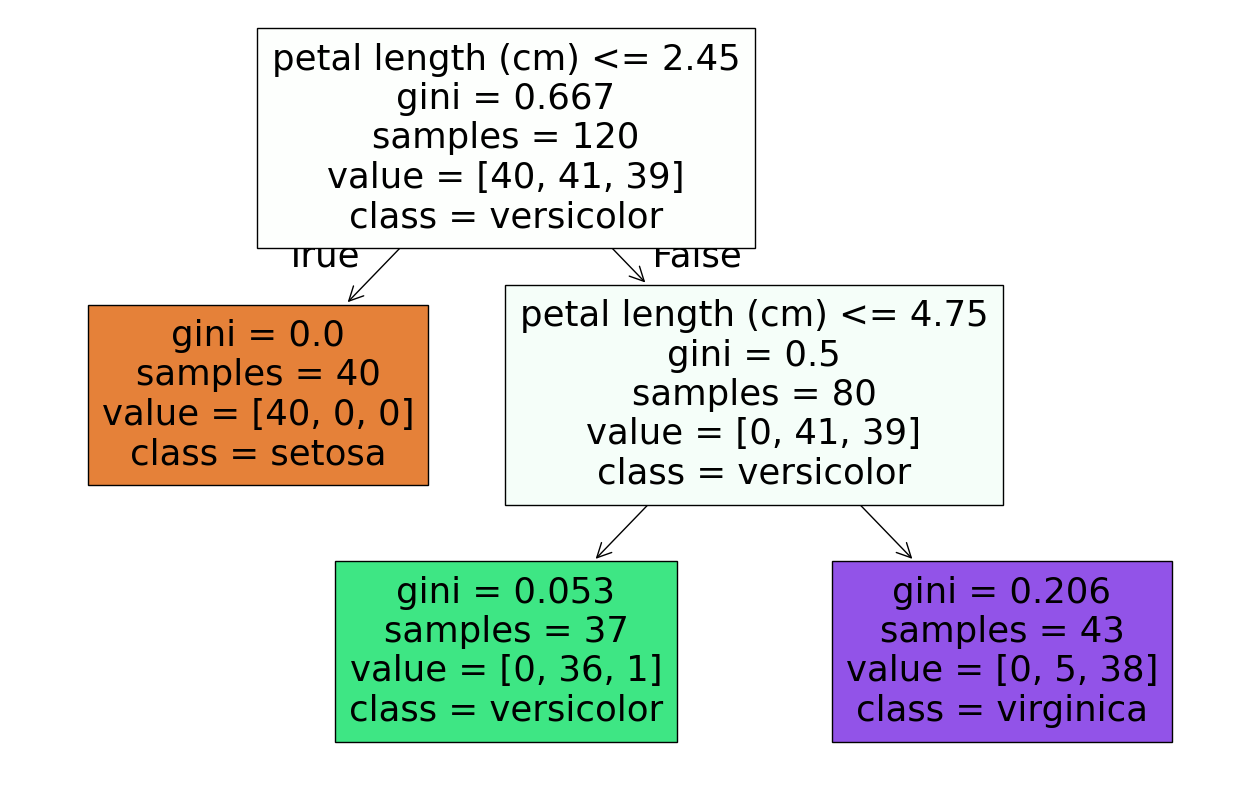

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    tree_clf_limited,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()

In [8]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
train_sizes, train_scores, valid_scores = learning_curve(
    tree_clf_limited, X, y,
    cv=cv,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

In [10]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

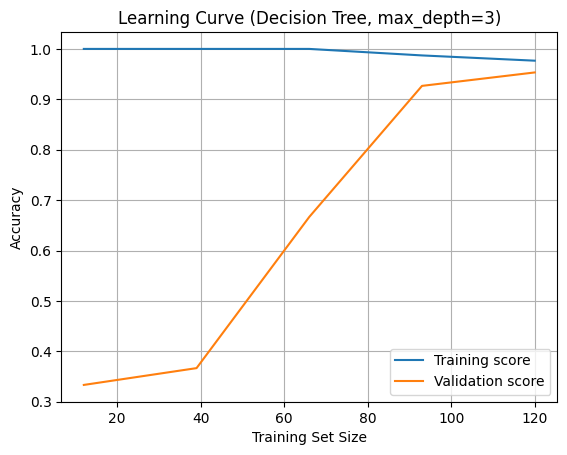

In [11]:
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, valid_scores_mean, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Decision Tree, max_depth=3)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
param_range = np.arange(1, 11)  # depths from 1 to 10

# Get validation curve data
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X, y,
    param_name="max_depth",
    param_range=param_range,
    cv=cv,
    scoring="accuracy"
)

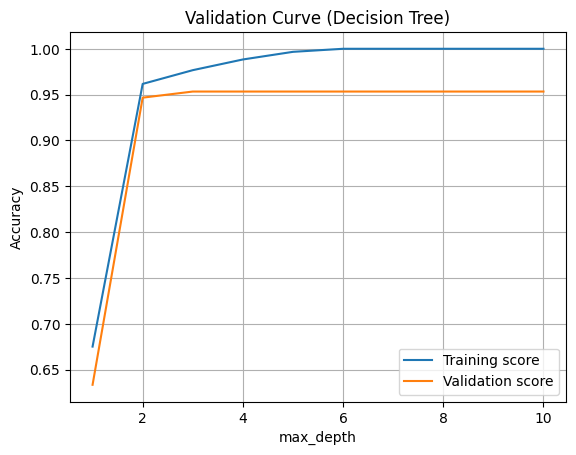

In [16]:
# Calculate mean scores
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, valid_scores_mean, label="Validation score")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()